In [1]:
import time
from matplotlib import pyplot as plt
import numpy as np
import pyvisa as visa
from tqdm import tqdm
import nidaqmx
import pandas as pd
import utils

In [2]:
#%%
# inicializo comunicacion con equipos
rm = visa.ResourceManager()

# lista de dispositivos conectados, para ver las id de los equipos
print(rm.list_resources())

('GPIB0::1::INSTR', 'GPIB0::7::INSTR')


In [3]:
func = rm.open_resource("GPIB0::1::INSTR")

In [4]:
#para saber el ID de la placa conectada (DevX)
system = nidaqmx.system.System.local()
for device in system.devices: 
    print(device)

with nidaqmx.Task() as task:
    ai_channel = task.ai_channels.add_ai_voltage_chan("Dev3/ai1",max_val = 1,min_val=0)
    print(ai_channel.ai_term_cfg)    
    print(ai_channel.ai_max)
    print(ai_channel.ai_min)

Device(name=Dev3)
TerminalConfiguration.DIFF
1.0
-1.0


In [5]:
# configuramos una sinusoidal
func.write("FUNC 0") # 1 Cuadrada, 0 para el seno
# Seteamos el offset
offset = 0
func.write(f'OFFS {offset}')

# Seteamos la amplitud 
amp = 0
func.write(f'AMPL {amp} VP')

# func.write('OUTE1')
freq = 1000
func.write(f'FREQ {freq}')

11

In [59]:
V = utils.medir(duracion = 10, fs = 1000,device_name = nidaqmx.system.System.local().devices[0].name)

In [60]:
tiempo, V = utils.medir_continuo(duracion= 10, fs= 250000, max_iter = 1)

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:11<00:00, 11.69s/it]


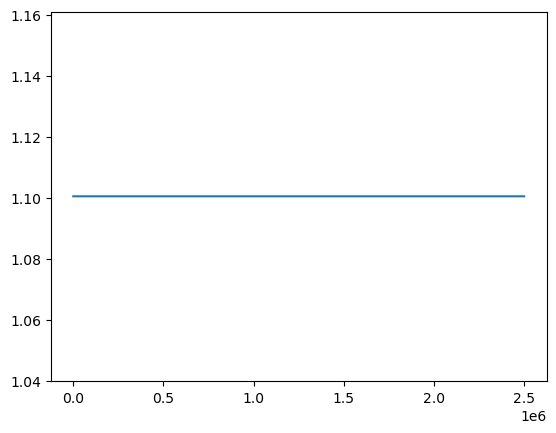

In [61]:
plt.plot(V)

In [14]:
# Seteamos el offset
offset = 1
func.write(f'OFFS {offset}')

8

In [5]:
# Empezamos con el láser apagado
offset = 0
func.write(f'OFFS {offset}')
time.sleep(10)


# Seteamos el offset
offset = 2
func.write(f'OFFS {offset}')


duracion = 10*60

tiempo, V = utils.medir_continuo(duracion= duracion, fs= 20, max_iter = 1)

tiempos = np.linspace(0,duracion,len(V))

100%|██████████| 1/1 [10:01<00:00, 601.04s/it]


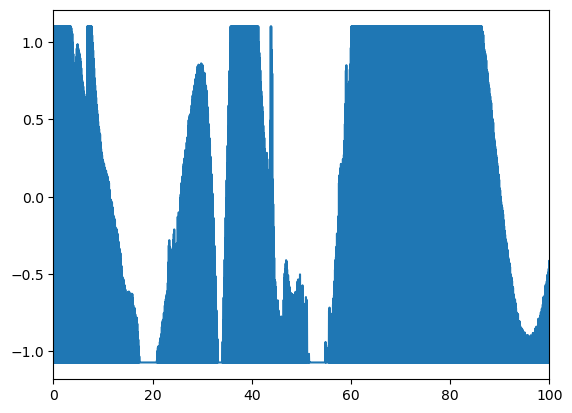

In [10]:
plt.plot(tiempos,V)
plt.xlim(0,100)
plt.show()

In [33]:
# Empezamos con el láser apagado
offset = 0
func.write(f'OFFS {offset}')
time.sleep(10)

duracion = 20*60
device_name = nidaqmx.system.System.local().devices[0].name


# Seteamos el offset
offset = 1.8
func.write(f'OFFS {offset}')


V = utils.medir(duracion= duracion, fs= 20, device_name = device_name)
tiempos = np.linspace(0,duracion,len(V))

# Terminamos con el láser apagado
offset = 0
func.write(f'OFFS {offset}')


8

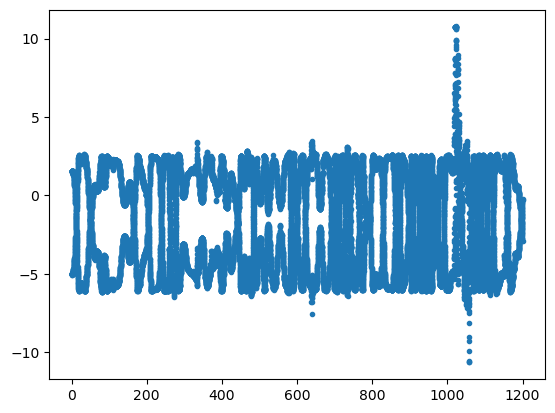

In [35]:
plt.plot(tiempos,V,".")
# plt.xlim(0,100)
plt.show()

In [36]:
df = pd.DataFrame()

df["T"] = tiempos
df["V"] = V

df.to_csv(f"../mediciones/D.D/Medicion laser continua/R = 50/offset {offset}.csv")

In [24]:
V.shape

(12000,)

In [30]:
df = pd.read_csv("../mediciones/D.D/Medicion laser continua/R = 50/prueba.csv")

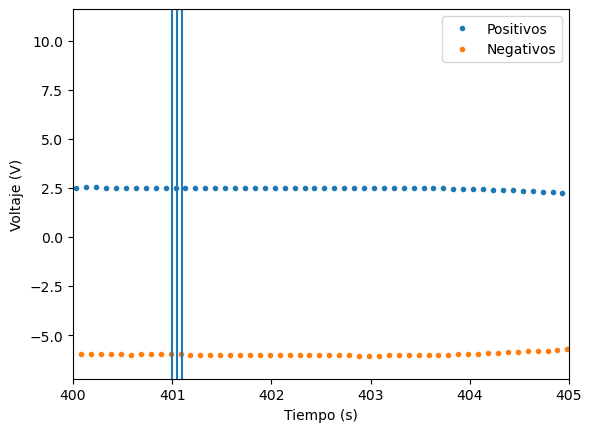

In [31]:
plt.plot(df[df["V"] > 0]["T"],df[df["V"] > 0]["V"],".", label = "Positivos")
plt.plot(df[df["V"] <= 0]["T"],df[df["V"] <= 0]["V"],".",label = "Negativos")
plt.ylabel("Voltaje (V)")
plt.xlabel("Tiempo (s)")
plt.xlim(400,405)
plt.axvline(401)
plt.axvline(401.05)
plt.axvline(401.1)
plt.legend()
plt.show()